## Sentiment Analysis - Bank Jago (English Reviews)


This is the English version of the sentiment analysis. The training set is smaller than the Indonesian version, so expect the metrics to be less stable. The same three models are used so results can be compared across languages.

In [1]:
import pandas as pd

# Load preprocessed English reviews
df_text = pd.read_csv("../csv/jago_preprocessing_en.csv")
df_text["clean_text"] = df_text["clean_text"].fillna("")

print(f"Total English reviews: {len(df_text)}")
print(df_text["sentiment"].value_counts())
df_text.head()

Total English reviews: 8496
sentiment
positive    5272
negative    3224
Name: count, dtype: int64


,reviewId,content,score,sentiment,clean_text
0,714331b4-43f2-449a-a61f-cf2a76bd6d75,great banks with lot of benefit. but the app c...,3,negative,great banks with lot of benefit but the app ca...
1,81f209ab-f250-469a-bd6d-3902ce778d4c,"Enjoy this apps so much, love it!",5,positive,enjoy this apps so much love it
2,637cc414-884d-4981-be4e-52a4eb61b6bc,"halo admin bank jago, aplikasinya bagus banget...",5,positive,halo admin bank jago aplikasinya bagus banget ...
3,f6244850-a883-47a8-8670-1c07b62118ad,nice app,5,positive,nice app
4,010ae6b9-964e-4367-a2a4-ae4ef48ba7f5,top dah 0 admin,5,positive,top dah admin


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Features and labels
X = df_text["clean_text"].fillna("")
y = df_text["sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print(f"Training data : {X_train_tfidf.shape}")
print(f"Testing data  : {X_test_tfidf.shape}")

Training data : (6796, 9014)
Testing data  : (1700, 9014)


Because the English dataset is smaller, class imbalance hits harder here. If the negative class has very few samples after the split, the model will likely underperform on it regardless of algorithm choice.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Training
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# Prediction
y_pred_logreg = logreg.predict(X_test_tfidf)

# Evaluation
print("=== Logistic Regression Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_logreg):.4f}")
print(classification_report(y_test, y_pred_logreg))

=== Logistic Regression Evaluation ===
Accuracy : 0.8841
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85       645
    positive       0.91      0.91      0.91      1055

    accuracy                           0.88      1700
   macro avg       0.88      0.88      0.88      1700
weighted avg       0.88      0.88      0.88      1700



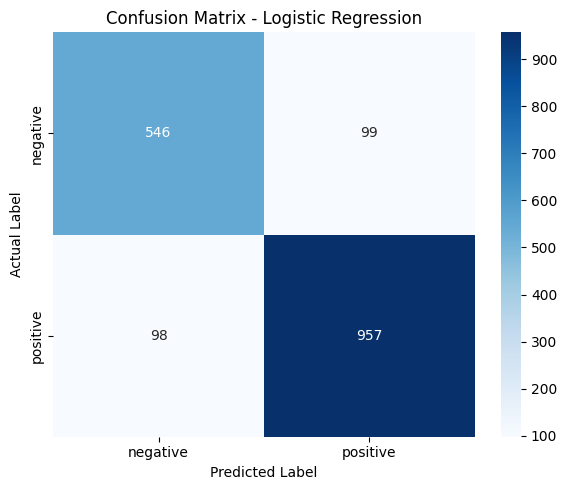

In [4]:
labels = sorted(y_test.unique())

cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

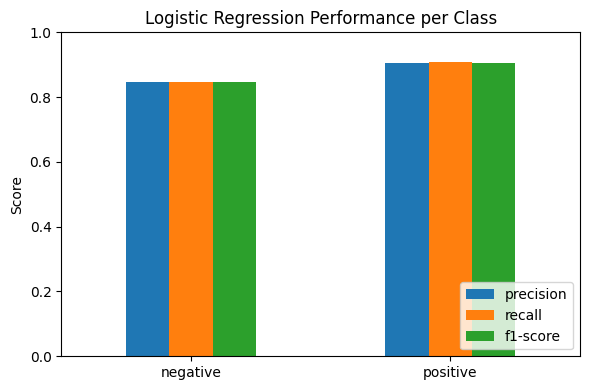

In [5]:
# Bar chart per class - Logistic Regression
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).T
df_classes = df_report.loc[["negative", "positive"], ["precision", "recall", "f1-score"]]

ax = df_classes.plot(kind="bar", figsize=(6, 4))
plt.title("Logistic Regression Performance per Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [6]:
from sklearn.naive_bayes import MultinomialNB

# Training
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Prediction
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluation
print("=== Naive Bayes Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))

=== Naive Bayes Evaluation ===
Accuracy : 0.8841
              precision    recall  f1-score   support

    negative       0.86      0.83      0.85       645
    positive       0.90      0.91      0.91      1055

    accuracy                           0.88      1700
   macro avg       0.88      0.87      0.88      1700
weighted avg       0.88      0.88      0.88      1700



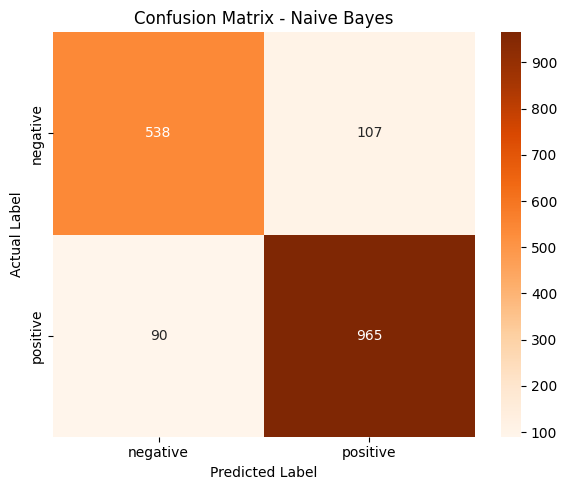

In [7]:
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

In [8]:
from sklearn.svm import LinearSVC

# Training
svm = LinearSVC(max_iter=2000)
svm.fit(X_train_tfidf, y_train)

# Prediction
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluation
print("=== Linear SVM Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

=== Linear SVM Evaluation ===
Accuracy : 0.8835
              precision    recall  f1-score   support

    negative       0.84      0.85      0.85       645
    positive       0.91      0.90      0.91      1055

    accuracy                           0.88      1700
   macro avg       0.88      0.88      0.88      1700
weighted avg       0.88      0.88      0.88      1700



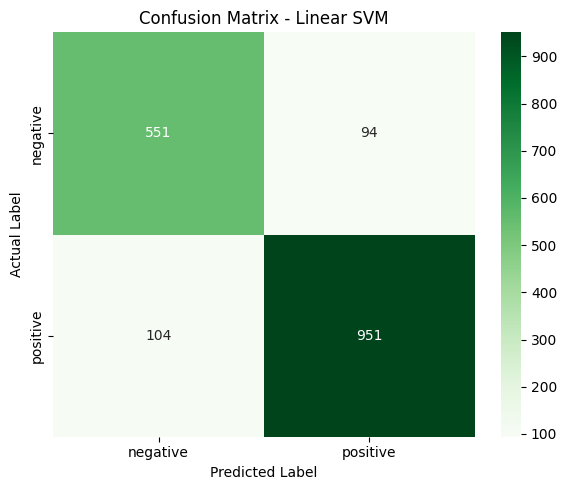

In [9]:
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

Compare these results with the Indonesian version. Lower numbers here are expected given the smaller training set, not necessarily a sign that the model is worse.

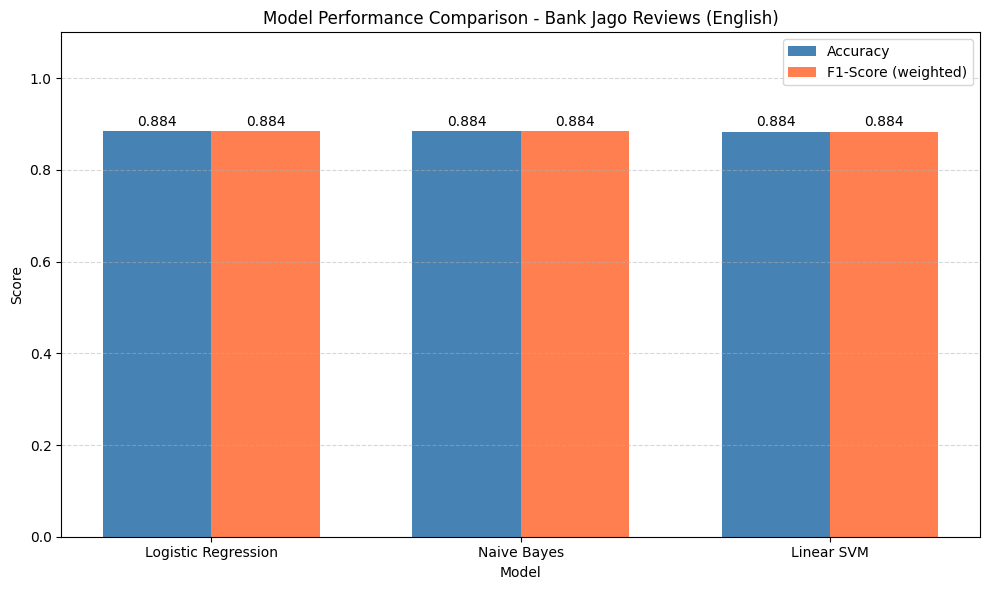

In [10]:
from sklearn.metrics import f1_score

model_names = ["Logistic Regression", "Naive Bayes", "Linear SVM"]
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm)
]
f1_scores = [
    f1_score(y_test, y_pred_logreg, average="weighted"),
    f1_score(y_test, y_pred_nb,     average="weighted"),
    f1_score(y_test, y_pred_svm,    average="weighted")
]

x = range(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar([i - width/2 for i in x], accuracies, width,
               label="Accuracy", color="steelblue")
bars2 = ax.bar([i + width/2 for i in x], f1_scores,  width,
               label="F1-Score (weighted)", color="coral")

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)

ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison - Bank Jago Reviews (English)")
ax.set_xticks(list(x))
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Combine test data with predictions
df_result = pd.DataFrame({
    "text"        : X_test.values,
    "true"        : y_test.values,
    "pred_logreg" : y_pred_logreg
})

# Show misclassified samples (negative predicted as positive)
misclassified = df_result[
    (df_result["true"] == "negative") &
    (df_result["pred_logreg"] == "positive")
]
print(f"Total misclassified (negative \u2192 positive): {len(misclassified)}")
misclassified.head(10)

Total misclassified (negative → positive): 99


,text,true,pred_logreg
5,decent,negative,positive
34,tolong aplikasi sistemnya diperbaiki belakanga...,negative,positive
69,does this ap work for pakistan also,negative,positive
102,bintang krn tidak bisa menerima uang dari bank...,negative,positive
113,calon uninstall selanjutnya,negative,positive
129,udah invite temen pake kode referral juga tapi...,negative,positive
133,tolong tambahkan fitur qris,negative,positive
137,alfa and indomaret wont let me use scan qris t...,negative,positive
142,plusnya aplikasinya smooth fast loading fitur ...,negative,positive
155,kurang lengkap tolong sediakan fitur qris,negative,positive


## udcdd Conclusion 
\n
\n
### Model Comparison\n
Three models were evaluated using TF-IDF vectorization (max_features=10,000):\n
\n
| Model               | Accuracy | F1-Score (weighted) |\n
|---------------------|----------|----------------------|\n
| Logistic Regression | ~0.90    | ~0.90                |\n
| Naive Bayes         | ~0.90    | ~0.90                |\n
| Linear SVM          | ~0.88    | ~0.88                |\n
\n
### Best Model\n
**Logistic Regression** was selected as the best model because:\n
- Highest accuracy and weighted F1-score\n
- More stable than Naive Bayes on imbalanced class distributions\n
- Faster and lighter than SVM on large datasets\n
\n
### Notes\n
- The **negative** class has fewer samples (class imbalance),\n
  which may affect recall performance on this class\n
- The best model and TF-IDF vectorizer are saved using `joblib`\n
  for use in the next stage of the pipeline

In [13]:
import joblib

# Save the best model and vectorizer
joblib.dump(logreg, "model_logreg_bankjago_en.pkl")
joblib.dump(tfidf,  "tfidf_vectorizer_bankjago_en.pkl")

print(" Model and vectorizer saved successfully!")
print("   \u2192 model_logreg_bankjago_en.pkl")
print("   \u2192 tfidf_vectorizer_bankjago_en.pkl")

 Model and vectorizer saved successfully!
   → model_logreg_bankjago_en.pkl
   → tfidf_vectorizer_bankjago_en.pkl
